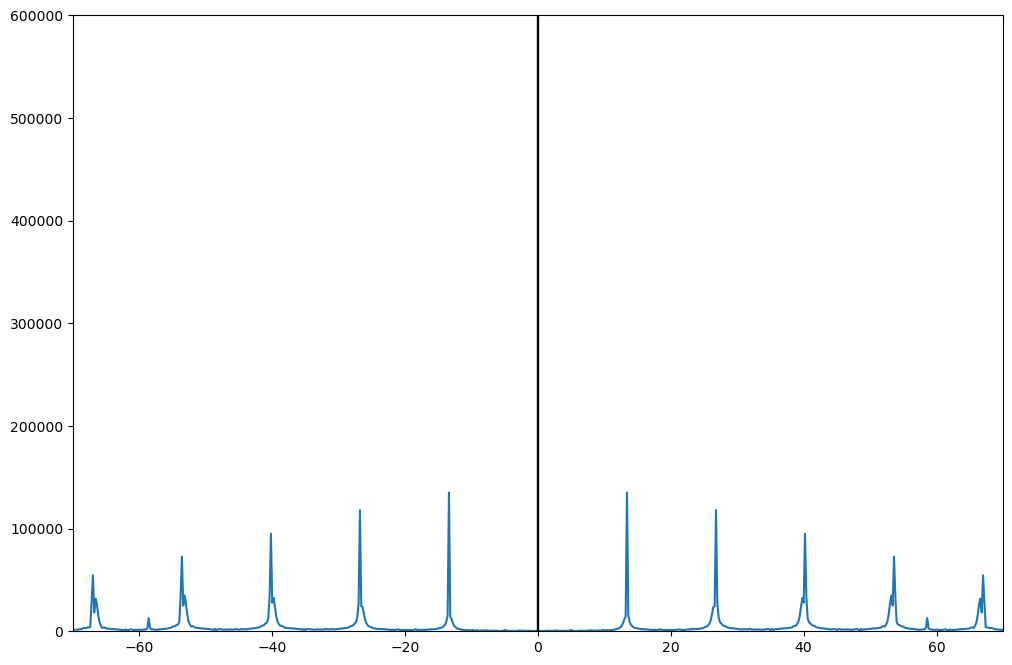

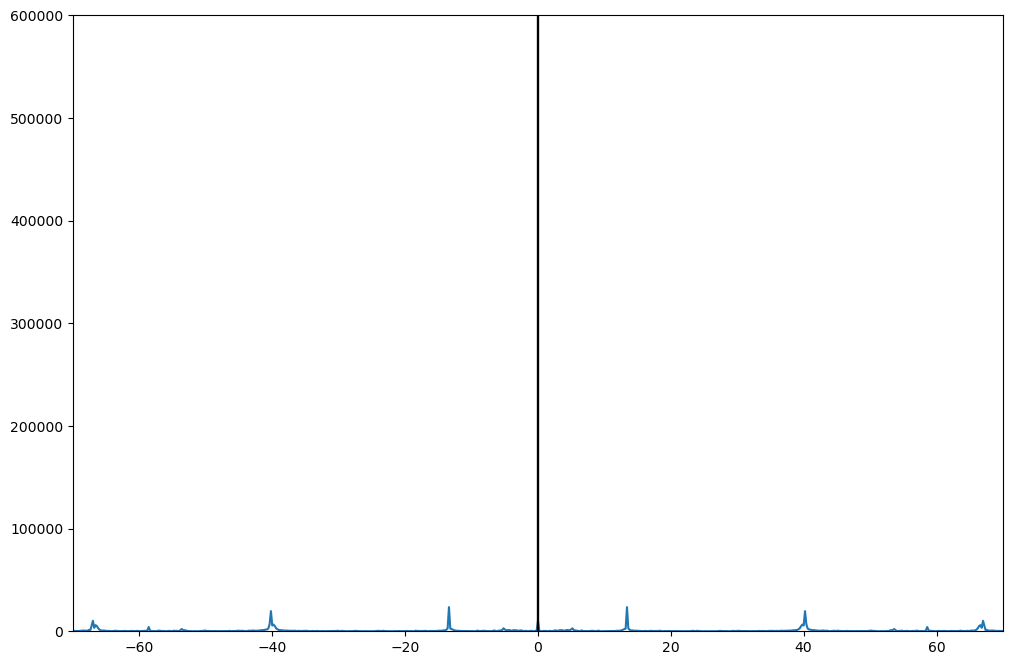

In [5]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
dados = np.loadtxt("13.7216.csv", delimiter=",")
from scipy.optimize import minimize_scalar



def transformada(dados,x1,x2):#x1 e x2 são as frequências (eixo x)
    n = len(dados)#comprimento do sinal
    fs = 50000 #frequencia de amostragem em hz
    t = 1/fs #periodo de amostragem
    vt = np.arange(0,n/fs,t) #vetor tempo
    f = np.fft.fftfreq(n,t) #vetor frequencia
    transf_tac = np.abs(np.fft.fft(dados[:,0])) # modulo da transformada de fourier
    transf_acel = np.abs(np.fft.fft(dados[:,1])) # modulo da transformada de fourier
    transf_tac2 = np.fft.fftshift(transf_tac)
    transf_acel2 = np.fft.fftshift(transf_acel)
    desloc = np.fft.fftshift(f) #Desloca o componente de frequência zero para o centro do espectro
    
    
    plt.figure(figsize = (12,8))
    plt.plot(desloc, transf_tac2)
    plt.axis((-70,70,0,600000))
    y = 600000
    plt.plot( (x1, x1 ), ( 0,  y), 'k' )
    plt.plot( (-x1, -x1), ( 0,  y), 'k' )
    plt.plot( (2*x1, 2*x1 ), ( 0,  y), 'k' )
    plt.plot( (-2*x1, -2*x1), ( 0,  y), 'k' )
    plt.savefig('imagem.png')
    
    
    plt.figure(figsize = (12,8))
    plt.plot(desloc, transf_acel2)
    plt.axis((-70,70,0,600000))
    y = 600000
    plt.plot( (x2, x2 ), ( 0,  y), 'k' )
    plt.plot( (-x2, -x2), ( 0,  y), 'k' )
    plt.plot( (2*x2, 2*x2 ), ( 0,  y), 'k' )
    plt.plot( (-2*x2, -2*x2), ( 0,  y), 'k' )
    plt.savefig('imagem2.png')
    

    return transf_tac,transf_acel,f
transf_tac,transf_acel,f = transformada(dados,0,0)

Insira as coordenadas mais adequadas para bounds do motor com base nos gráficos acima16
Insira as coordenadas mais adequadas para bounds do acelerômetro com base nos gráficos acima20
 
 Digite 1 para analisar PISTA EXTERNA 
 Digite 2 para analisar GAIOLA 
 Digite 3 para analisar ELEMENTOS ROLANTES
Qual falha você quer analisar?1
Há falha na pista externa
---------------------------------------------------------------
A frequência do acelerômetro encontrada foi de:
40.21693059964441
A frequência de rotação do motor encontrada foi de é 
13.400563012962156


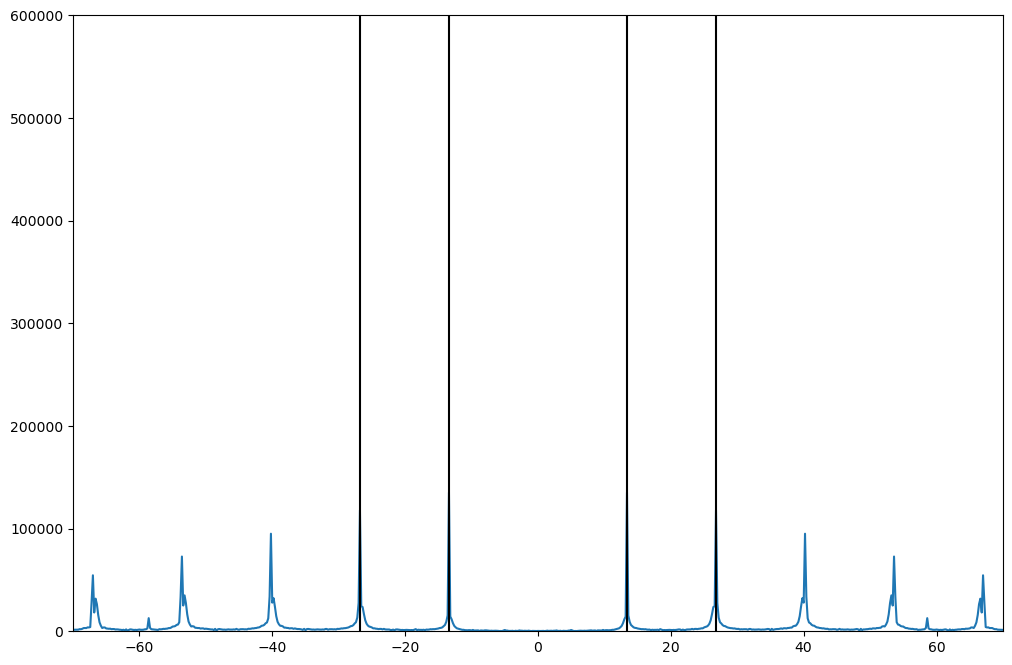

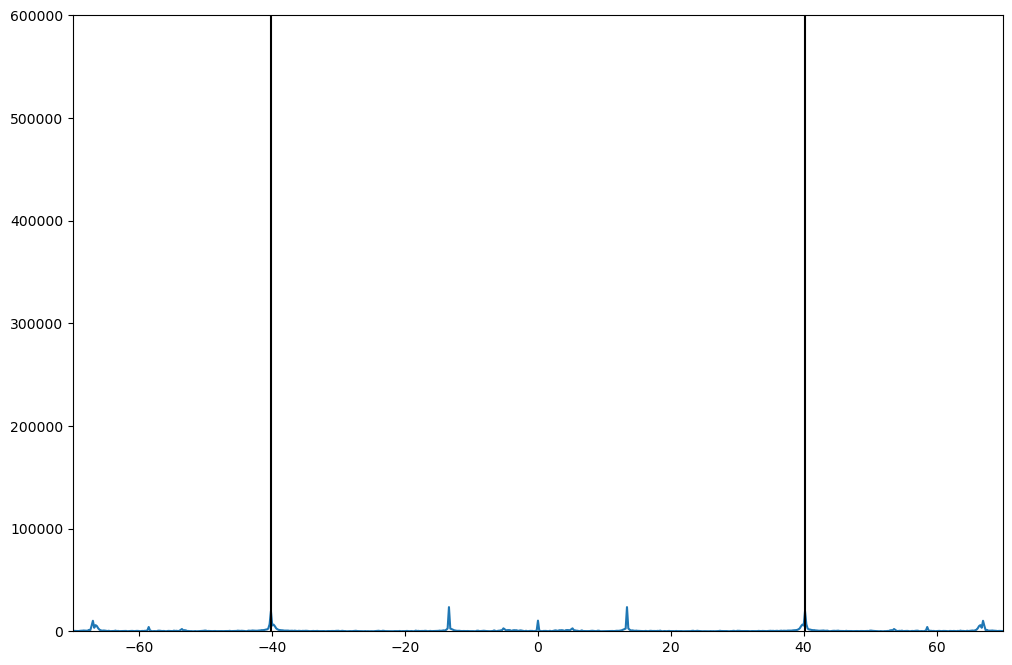

In [6]:
pista_externa = 2.998
gaiola = 0.375
elem_rol = 1.871

def g(x, fft, freqs, n):
    retval = 0.0
    for i in range(1, n + 1):
        idx_p = np.argmin(np.abs(freqs - i * x))
        retval = (retval + abs(fft[idx_p]))

        idx_n = np.argmin(np.abs(freqs + i * x))
        retval = (retval + abs(fft[idx_n]))
    return -retval


bounds_motor = int(input("Insira as coordenadas mais adequadas para bounds do motor com base nos gráficos acima"))
def det_freq_motor(transf_tac,f):
    global bounds_motor
    lista = []
    lista_final = []
    res = minimize_scalar(lambda x: g(x,transf_tac,f,10), method ='bounded', bounds=(bounds_motor,60))
    lista.append(res.x)
    for n in [1/4,1/3,1/2,2,3,4]:
        res_novo = minimize_scalar(lambda x: g(x,transf_tac,f,10), method ='bounded', bounds=( res.x / n - 2, res.x / n + 2 ), options = { 'xatol': 1e-6 })
        lista.append(res_novo.x)
    #print(lista)
    for i in range(len(lista)):
        d = g( lista[i], transf_tac, f, 10 )
        lista_final.append(-d)
    #print(lista_final)
    endereco = lista_final.index(max(lista_final))
    f_motor = lista[endereco]
    return f_motor

bounds_acel = int(input("Insira as coordenadas mais adequadas para bounds do acelerômetro com base nos gráficos acima"))
def det_freq_acel(transf_acel,f):
    global bounds_acel
    lista = []
    lista_final = []
    res = minimize_scalar(lambda x: g(x,transf_acel,f,10), method ='bounded', bounds=(bounds_acel,60))
    lista.append(res.x)
    for n in [1/4,1/3,1/2,2,3,4]:
        res_novo = minimize_scalar(lambda x: g(x,transf_acel,f,10), method ='bounded', bounds=( res.x / n - 2, res.x / n + 2 ), options = { 'xatol': 1e-6 })
        lista.append(res_novo.x)
    #print(lista)
    for i in range(len(lista)):
        d = g( lista[i], transf_acel, f, 10 )
        lista_final.append(-d)
    #print(lista_final)
    endereco = lista_final.index(max(lista_final))
    f_acel = lista[endereco]
    return f_acel
f_motor = det_freq_motor(transf_tac,f)
f_acel = det_freq_acel(transf_acel,f)


var_prin = 0
if f_acel<f_motor:
    var_prin = (f_acel/f_motor)
else:
    var_prin = (f_motor/f_acel)



print(" \n Digite 1 para analisar PISTA EXTERNA \n Digite 2 para analisar GAIOLA \n Digite 3 para analisar ELEMENTOS ROLANTES")
esc = int(input("Qual falha você quer analisar?"))
if esc == 1:
    cont = 0
    for j in range(1,30):
        if abs(var_prin*j-pista_externa) < pista_externa*0.001:
            cont = cont+1
        if abs(var_prin/j-pista_externa) < pista_externa*0.001:
            cont = cont+1
    if cont != 0:
        print("Há falha na pista externa")
    else:
        print("Não há falha na pista externa")
elif esc == 2:
    cont = 0
    for j in range(1,30):
        if abs(var_prin*j-gaiola) < gaiola*0.001:
            cont = cont+1
        if abs(var_prin/j-gaiola) < gaiola*0.001:
            cont = cont+1
    if cont != 0:
        print("Há falha na gaiola")
    else:
        print("Não há falha na gaiola")
elif esc == 3:
    cont = 0
    for j in range(1,30):
        if abs(var_prin*j-elem_rol) < elem_rol*0.001:
            cont = cont+1
        if abs(var_prin/j-elem_rol) < elem_rol*0.001:
            cont = cont+1
    if cont != 0:
        print("Há falha nos elementos rolantes")
    else:
        print("Não há falha nos elementos rolantes")               
else:
    print("Não é possível escolher essa opção")
    
print("---------------------------------------------------------------")    

print("A frequência do acelerômetro encontrada foi de:")
print(f_acel)
print("A frequência de rotação do motor encontrada foi de é ")
print(f_motor)
fim = transformada(dados,f_motor,f_acel)